In [19]:
#importing libraries
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [20]:
#define state
class BMIState(TypedDict):
    weight: float
    height: float
    bmi: float
    category: str

In [21]:
def calculate_bmi(state: BMIState) -> BMIState:
    weight = state['weight']
    height = state['height']
    bmi = weight / (height ** 2)
    state['bmi'] = bmi
    return state

In [22]:
def determine_bmi_category(state: BMIState) -> BMIState:
    bmi = state['bmi']
    if bmi < 18.5:
        state['category'] = 'Underweight'
    elif 18.5 <= bmi < 24.9:
        state['category'] = 'Normal weight'
    elif 25 <= bmi < 29.9:
        state['category'] = 'Overweight'
    else:
        state['category'] = 'Obesity'
    return state

In [23]:
#define graph
graph = StateGraph(BMIState)

# add nodes
graph.add_node('calculate_bmi', calculate_bmi)
graph.add_node('determine_bmi_category', determine_bmi_category)

# add edges
graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'determine_bmi_category')
graph.add_edge('determine_bmi_category', END)

# compile the graph
workflow = graph.compile()

In [24]:
# execute the graph
initial_state: BMIState = {'weight': 90, 'height': 1.74}  # type: ignore
final_state = workflow.invoke(initial_state)

print(f"BMI: {final_state}")

BMI: {'weight': 90, 'height': 1.74, 'bmi': 29.72651605231867, 'category': 'Overweight'}


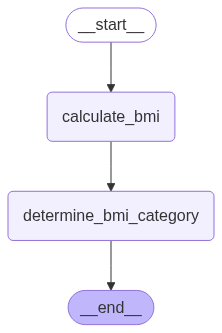

In [25]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())